In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Template Matching

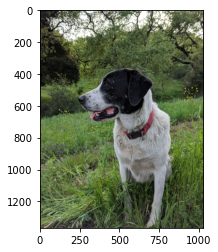

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

In [3]:
full.shape

(1367, 1025, 3)

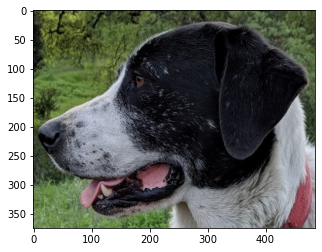

In [4]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [5]:
face.shape

(375, 486, 3)

In [6]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# all search for maximum except for 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'

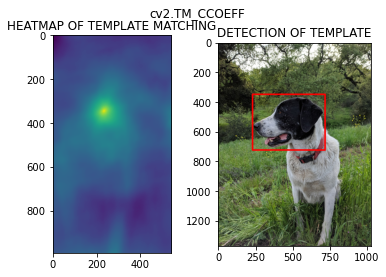

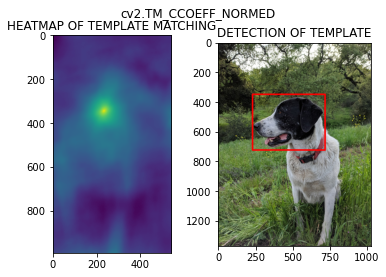

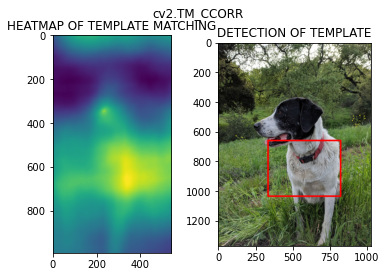

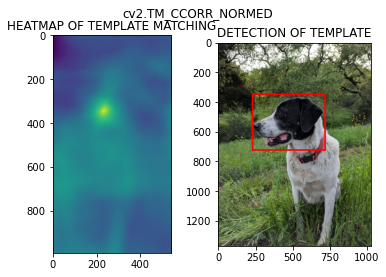

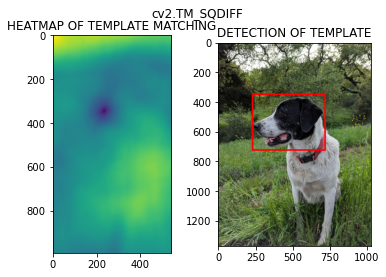

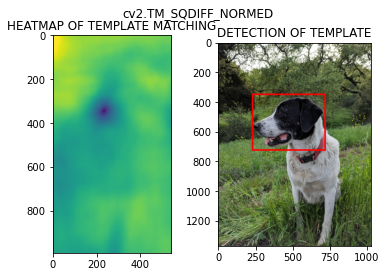

In [7]:
for m in methods:
    
    # CREATE A COPY
    full_copy = full.copy()
    
    method = eval(m)
    
    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        # since 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED' search for minimum
        top_left = min_loc  # it looks something like this (x,y)
    else:
        # while others search for maximum
        top_left = max_loc
        
    height, width, channels = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)  # since (x,y)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    # PLOT AND SHOW THE IMAGES
    
    plt.subplot(121)  # give me a plot with 1 row and 2 columns, last 1 means grab the first one
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)  # give me a plot with 1 row and 2 columns, last 2 means grab the second one
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    # TITLE EVERYTHING WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')

## Corner Detection

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

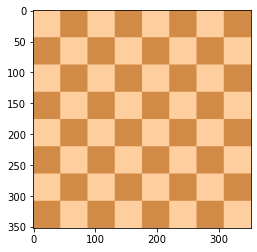

In [9]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

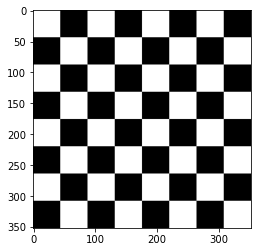

In [10]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

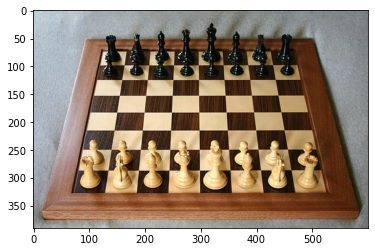

In [11]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

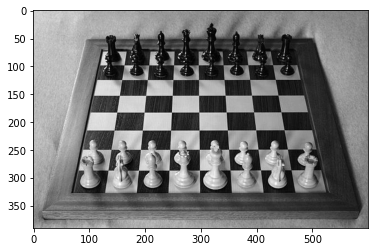

In [12]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

In [13]:
gray_flat_chess
# all are integers and needed to convert to float for Harris corner detection

array([[197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197]], dtype=uint8)

In [14]:
gray = np.float32(gray_flat_chess)

In [15]:
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

### Harris corner detection algorithm

In [16]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
# source
# blockSize - neighborhood size
# ksize - aperture parameter for the Sobel operator
# k - Harris detector free parameter (if still failed increase this number)

In [17]:
# result is dilated for marking the corners
# not actually important for corner detection
# only so that we can plot out the points on the image below to show the result
dst = cv2.dilate(dst,None)

In [18]:
flat_chess[dst > 0.01*dst.max()] = [255,0,0]
# whenever the result of corner harris is greater than 1% of the max value then equal that to color red

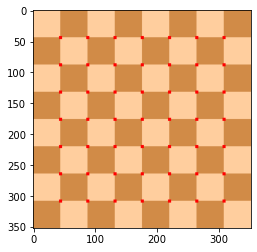

In [19]:
plt.imshow(flat_chess)

In [20]:
# Let's try it on the real chessboard
gray = np.float32(gray_real_chess)

dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [21]:
dst = cv2.dilate(dst,None)

In [22]:
real_chess[dst > 0.01*dst.max()] = [255,0,0]

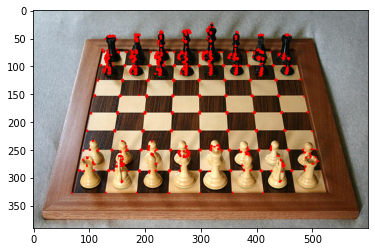

In [23]:
plt.imshow(real_chess)

## Corner Detection - Part Two - Shi-Tomasi Detection

In [24]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [25]:
# Shi-Tomasi Detection
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)
# source
# maxCorners - how many corner you want to detect maximum (want all corner? use -1)
# qualityLevel
# minDistance

In [26]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]],

       [[220., 132.]],

       [[176., 132.]],

       [[132., 132.]],

       [[ 88., 132.]],

       [[ 44., 132.]],

       [[308.,  88.]],

       [[264.,  88.]],

       [[220.,  88.]],

       [[176.,  88.]],

       [[132.,  88.]],

       [[ 88.,  88.]],

       [[ 44.,  

The downside of `goodFeaturesToTrack` is, it can't automatically mark the corner like `cornerHarris`

It means we need to flatten out the array and drop little circle on it

In [27]:
corners = np.int0(corners)  # change to integer

In [28]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]],

       [[ 88, 308]],

       [[ 44, 308]],

       [[308, 264]],

       [[264, 264]],

       [[220, 264]],

       [[176, 264]],

       [[132, 264]],

       [[ 88, 264]],

       [[ 44, 264]],

       [[308, 220]],

       [[264, 220]],

       [[220, 220]],

       [[176, 220]],

       [[132, 220]],

       [[ 88, 220]],

       [[ 44, 220]],

       [[308, 176]],

       [[264, 176]],

       [[220, 176]],

       [[176, 176]],

       [[132, 176]],

       [[ 88, 176]],

       [[ 44, 176]],

       [[308, 132]],

       [[264, 132]],

       [[220, 132]],

       [[176, 132]],

       [[132, 132]],

       [[ 88, 132]],

       [[ 44, 132]],

       [[308,  88]],

       [[264,  88]],

       [[220,  88]],

       [[176,  88]],

       [[132,  88]],

       [[ 88,  88]],

       [[ 44,  88]],

       [[308,  44]],

       [[264,  44]],

       [[220,  44]],

       [[1

In [29]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

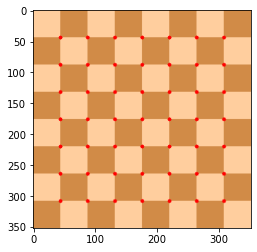

In [30]:
plt.imshow(flat_chess)

In [31]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01, 10)

In [32]:
corners = np.int0(corners)

In [33]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

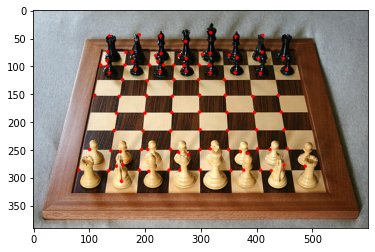

In [34]:
plt.imshow(real_chess)

## Edge Detection

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
img = cv2.imread('DATA/sammy_face.jpg')

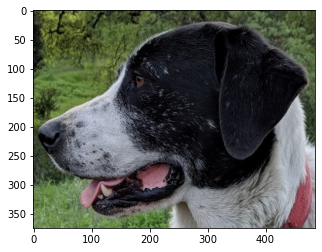

In [37]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### The Canny Algorithm

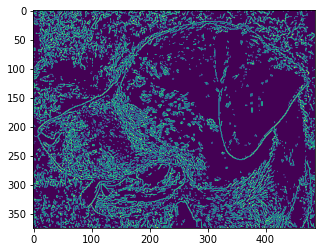

In [38]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.imshow(edges)

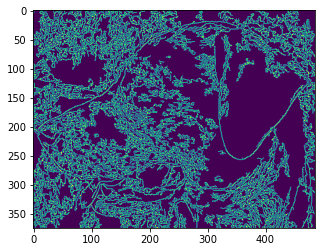

In [39]:
edges = cv2.Canny(image=img, threshold1=0 , threshold2=255)
plt.imshow(edges)

In [40]:
med_val = np.median(img)
med_val

64.0

In [41]:
# LOWER THRESHOLD TO EITHER 0 OR 70% OF THE MEDIAN VALUE WHICHEVER IS GREATER
lower = int(max(0, 0.7*med_val))

# UPPER THRESHOLD TO EITHER 130% OF THE MEDIAN OR THE MAS 255, WHICHEVER IS SMALLER
upper = int(min(255, 01.3*med_val))

In [42]:
upper

83

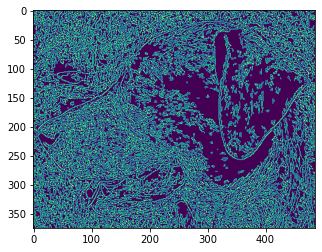

In [43]:
edges = cv2.Canny(image=img, threshold1=lower, threshold2=upper)
plt.imshow(edges)
# Seems not improve anything, in fact worse so we may try to increase the upper by `+` number

In [44]:
blurred_img = cv2.blur(img, ksize=(5,5))

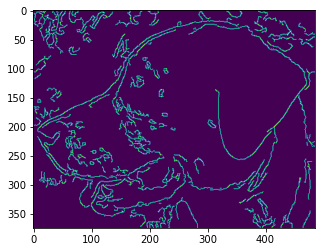

In [45]:
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper+50)
plt.imshow(edges)
# we can see the result is better
# basically this will work better if you blurred the image first
# we can try to play with the kernel size to improve it further
# other method is by expand the upper by `+` number

## Grid Detection

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

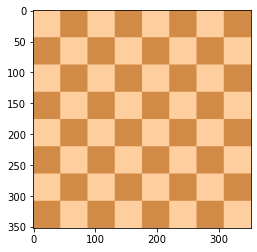

In [47]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

In [48]:
# findChessboardCorners
found, corners = cv2.findChessboardCorners(flat_chess, (7,7), )
# source
# size of grid is 7 since it is missing an edge for 8 to the end of the image

In [49]:
found  # True or False depends if it can find corners

True

In [50]:
corners  # list of coordinates where it found corners

array([[[ 43.500004,  43.500004]],

       [[ 87.5     ,  43.5     ]],

       [[131.5     ,  43.5     ]],

       [[175.5     ,  43.5     ]],

       [[219.5     ,  43.5     ]],

       [[263.5     ,  43.5     ]],

       [[307.5     ,  43.5     ]],

       [[ 43.499996,  87.50001 ]],

       [[ 87.5     ,  87.5     ]],

       [[131.5     ,  87.5     ]],

       [[175.5     ,  87.5     ]],

       [[219.5     ,  87.5     ]],

       [[263.5     ,  87.5     ]],

       [[307.5     ,  87.49999 ]],

       [[ 43.500004, 131.5     ]],

       [[ 87.5     , 131.5     ]],

       [[131.5     , 131.5     ]],

       [[175.5     , 131.5     ]],

       [[219.5     , 131.5     ]],

       [[263.5     , 131.5     ]],

       [[307.5     , 131.5     ]],

       [[ 43.499996, 175.5     ]],

       [[ 87.5     , 175.5     ]],

       [[131.5     , 175.5     ]],

       [[175.5     , 175.5     ]],

       [[219.5     , 175.5     ]],

       [[263.5     , 175.5     ]],

       [[307.5     , 175.5  

In [51]:
# drawChessboardCorners
cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)

array([[[255, 206, 158],
        [255, 206, 158],
        [255, 206, 158],
        ...,
        [209, 139,  71],
        [209, 139,  71],
        [209, 139,  71]],

       [[255, 206, 158],
        [255, 206, 158],
        [255, 206, 158],
        ...,
        [209, 139,  71],
        [209, 139,  71],
        [209, 139,  71]],

       [[255, 206, 158],
        [255, 206, 158],
        [255, 206, 158],
        ...,
        [209, 139,  71],
        [209, 139,  71],
        [209, 139,  71]],

       ...,

       [[209, 139,  71],
        [209, 139,  71],
        [209, 139,  71],
        ...,
        [255, 206, 158],
        [255, 206, 158],
        [255, 206, 158]],

       [[209, 139,  71],
        [209, 139,  71],
        [209, 139,  71],
        ...,
        [255, 206, 158],
        [255, 206, 158],
        [255, 206, 158]],

       [[209, 139,  71],
        [209, 139,  71],
        [209, 139,  71],
        ...,
        [255, 206, 158],
        [255, 206, 158],
        [255, 206, 158]]

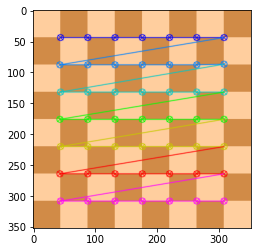

In [52]:
plt.imshow(flat_chess)
# notice how it draws on the picture directly
# to prevent this, using copy might be a good idea
# what `drawChessboardCorners` does: marks rows with different colors and connected them all with zig-zag lines

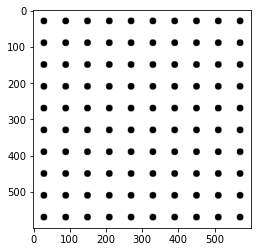

In [53]:
dots = cv2.imread('DATA/dot_grid.png')
dots = cv2.cvtColor(dots, cv2.COLOR_BGR2RGB)
plt.imshow(dots)

In [54]:
# findCirclesGrid
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

In [55]:
found

True

In [56]:
corners

array([[[ 29.5,  29.5]],

       [[ 89.5,  29.5]],

       [[149.5,  29.5]],

       [[209.5,  29.5]],

       [[269.5,  29.5]],

       [[329.5,  29.5]],

       [[389.5,  29.5]],

       [[449.5,  29.5]],

       [[509.5,  29.5]],

       [[569.5,  29.5]],

       [[ 29.5,  89.5]],

       [[ 89.5,  89.5]],

       [[149.5,  89.5]],

       [[209.5,  89.5]],

       [[269.5,  89.5]],

       [[329.5,  89.5]],

       [[389.5,  89.5]],

       [[449.5,  89.5]],

       [[509.5,  89.5]],

       [[569.5,  89.5]],

       [[ 29.5, 149.5]],

       [[ 89.5, 149.5]],

       [[149.5, 149.5]],

       [[209.5, 149.5]],

       [[269.5, 149.5]],

       [[329.5, 149.5]],

       [[389.5, 149.5]],

       [[449.5, 149.5]],

       [[509.5, 149.5]],

       [[569.5, 149.5]],

       [[ 29.5, 209.5]],

       [[ 89.5, 209.5]],

       [[149.5, 209.5]],

       [[209.5, 209.5]],

       [[269.5, 209.5]],

       [[329.5, 209.5]],

       [[389.5, 209.5]],

       [[449.5, 209.5]],

       [[509

In [57]:
# drawChessboardCorners
cv2.drawChessboardCorners(dots, (10,10), corners, found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

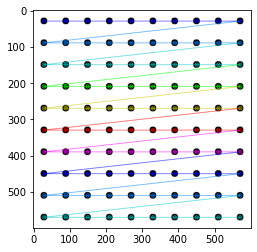

In [58]:
plt.imshow(dots)

## Contour Detection

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [60]:
img = cv2.imread('DATA/internal_external.png', 0)

In [61]:
img.shape

(652, 1080)

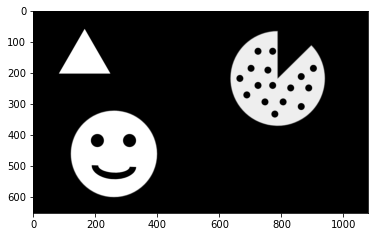

In [62]:
plt.imshow(img, cmap='gray')

### Find Contours

`RETR_CCOMP` grabs internal and external contours then organize them into two level hierarchy that you can index and call out

there are other methods in case you only want internal or external such as `RETR_EXTERNAL`

In [63]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [64]:
type(contours)

list

In [65]:
len(contours)

22

In [66]:
type(hierarchy)

numpy.ndarray

In [67]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [68]:
list(range(len(contours)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [69]:
external_contours = np.zeros(img.shape)

In [70]:
external_contours.shape

(652, 1080)

In [71]:
for i in range(len(contours)):
    
    # EXTERNAL
    if hierarchy[0][i][3] == -1:
    # we just checking out the last index (-1,0,4) and i is used to check every rows
        cv2.drawContours(external_contours, contours, i, 255, -1)

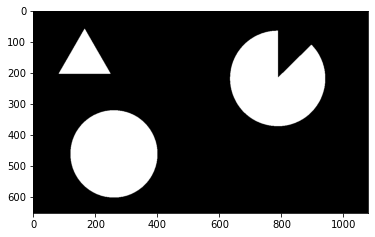

In [72]:
plt.imshow(external_contours, cmap='gray')

In [73]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    
    # INTERNAL
    if hierarchy[0][i][3] != -1:
        
        cv2.drawContours(internal_contours, contours, i, 255, -1)

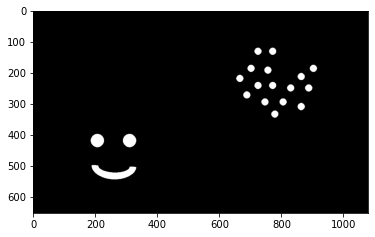

In [74]:
plt.imshow(internal_contours, cmap='gray')

## Feature Matching

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [76]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [77]:
reeses = cv2.imread('DATA/reeses_puffs.png', 0)

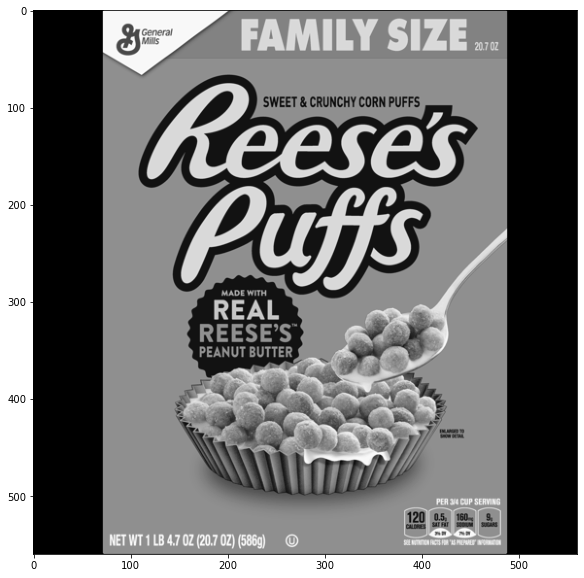

In [78]:
display(reeses)

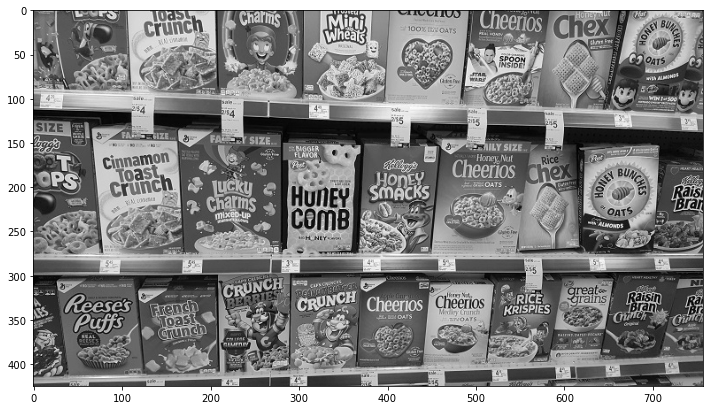

In [79]:
cereals = cv2.imread('DATA/many_cereals.jpg', 0)
display(cereals)

### Brute Force Detection

In [80]:
orb = cv2.ORB_create()

In [81]:
kp1,des1 = orb.detectAndCompute(reeses, None)
kp2,des2 = orb.detectAndCompute(cereals, None)
# source
# mask

In [82]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [83]:
matches = bf.match(des1,des2)

In [84]:
single_match = matches[0]
single_match.distance
# less distance, better match
# more distance, worse match

56.0

In [85]:
len(matches)
# notice how long the len is, might be better to slice it later

139

In [86]:
matches = sorted(matches, key=lambda x:x.distance)

In [87]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

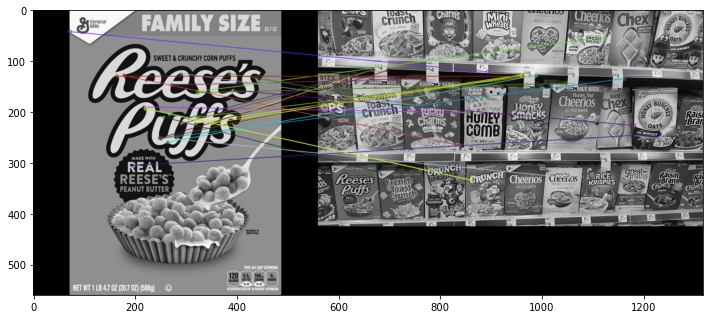

In [88]:
display(reeses_matches)
# notice the model didn't get anything right
# several reasons are no 'family size' text and the shape is a bit contort
# we might need a more sophisticated model for this problem

## Feature Matching - Part Two

### SIFT Detection (Scale-Invariant Feature Transform )

In [89]:
sift= cv2.xfeatures2d.SIFT_create()

In [90]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [91]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [92]:
bf = cv2.BFMatcher()

In [93]:
matches = bf.knnMatch(des1, des2, k=2)

In [94]:
matches[:5]

[[<DMatch 000001C0484089D0>, <DMatch 000001C047FABB70>],
 [<DMatch 000001C047FF8630>, <DMatch 000001C047FF8AF0>],
 [<DMatch 000001C047FF8590>, <DMatch 000001C047FF84D0>],
 [<DMatch 000001C047FF84F0>, <DMatch 000001C047FF8610>],
 [<DMatch 000001C047FF87F0>, <DMatch 000001C047FF8690>]]

In [95]:
good = []

# LESS DISTANCE == BETTER MATCH

# RATIO MATCH1 < 75% MATCH 2
for match1, match2 in matches:
    # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LET'S KEEP IT!
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [96]:
good[:5]

[[<DMatch 000001C0484089D0>],
 [<DMatch 000001C04803A070>],
 [<DMatch 000001C04803A630>],
 [<DMatch 000001C04803A670>],
 [<DMatch 000001C04803A870>]]

In [97]:
len(good)
# good matches from every matches

79

In [98]:
len(matches)
# as we can see we toss a lot of macthes and only left the good one

1501

In [99]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

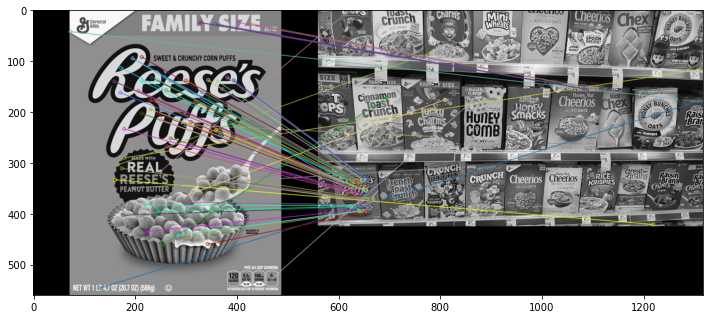

In [100]:
display(sift_matches)
# see how it performs much better than our previous feature matching
# now it succesfully fing where reese's puffs in the cereal aisle
# the interesting thing is the 'family size' text also match with other 'family size' text

In [101]:
sift = cv2.xfeatures2d.SIFT_create()

In [102]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

### FLANN parameter (Fast Library for Approximate Nearest Neighbors)
- Faster than brute force method
- It isn't gonna find the best possible matches but instead just find general good matches
- you can try to play with FLANN parameters in order to increase precision, but it comes at the cost of slowing the algorithm

In [103]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
# you can try to increase the trees numbers but keep in mind more trees means slower algorithm
search_params = dict(checks=50)

In [104]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [105]:
matches = flann.knnMatch(des1, des2, k=2)

In [106]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

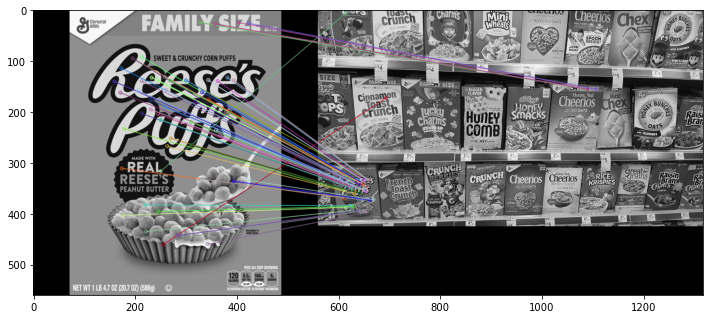

In [107]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
# you can try to put flags=0 or flags=2
# if you put 0, it will show every features that it matches on but only draw lines on the best one
# put it 2 then it will only put lines on the best one

display(flann_matches)
# notice we get similar result with SIFT
# on a large samples` FlannBasedMatcher` will be faster than `brute force method`

### Flann matchesMask

In [108]:
sift = cv2.xfeatures2d.SIFT_create()

In [109]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [110]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
# you can try to increase the trees numbers but keep in mind more trees means slower algorithm
search_params = dict(checks=50)

In [111]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [112]:
matches = flann.knnMatch(des1, des2, k=2)

In [113]:
matchesMask = [[0,0] for i in range(len(matches))]

In [114]:
matchesMask[:10]

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]]

In [115]:
good = []

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [116]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

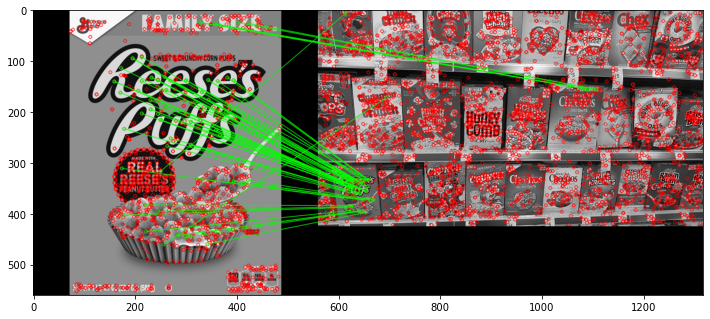

In [117]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)
# what it does: taking the draw_params to color where you got the good matches versus where you got these other points from flags=0
# or if you want you can just change it to flags=2 to see all these lines by themselves
# but normally people want to color this so they can see the relationship between the actual point

All we did was create mask then we create drawing parameters where we said color matches green and single point red

## Watershed Algorithm

In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [119]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [120]:
sep_coins = cv2.imread('DATA/pennies.jpg')

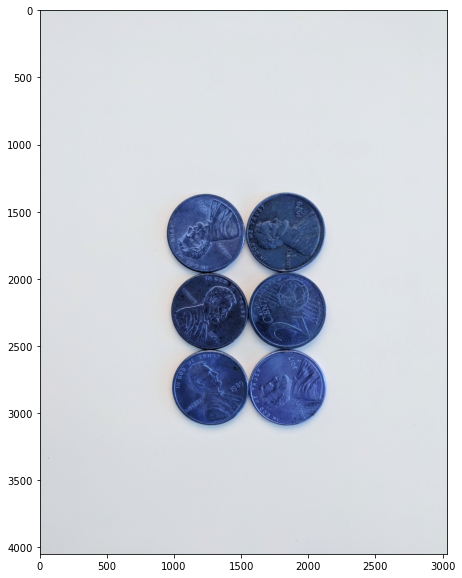

In [121]:
display(sep_coins)
# Notice how close they are
# For most computer vision algorithm, it will be hard for the to separate them by segment

Step we can try:
- Median Blur - remove features we don't need like the face
- Grayscale
- Binary Threshold - make black and white
- Find Contours

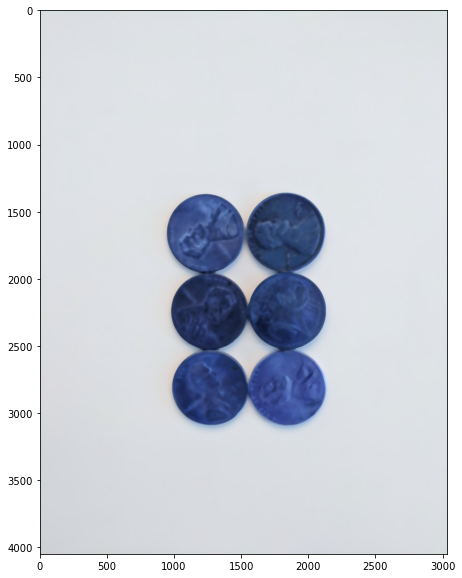

In [122]:
# median blur
sep_blur = cv2.medianBlur(sep_coins, 25)
display(sep_blur)

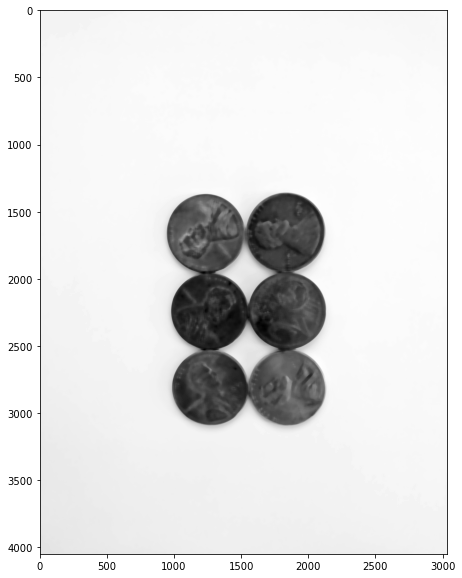

In [123]:
# grayscale
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

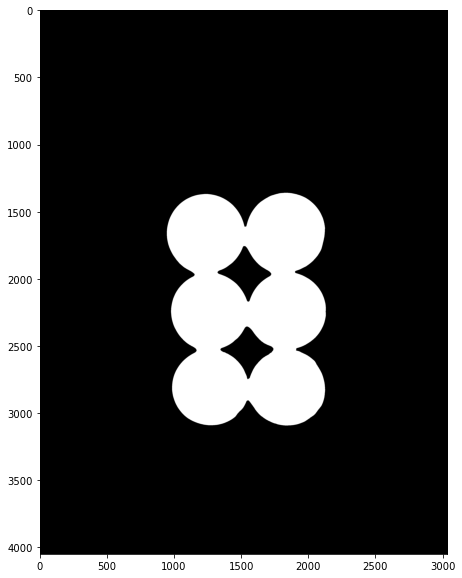

In [124]:
# binary threshold
ret, sep_tresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)
display(sep_tresh)
# as you notice there really aren't easy way to separate them
# might use erosion but it will mean change the size of the whole coin too

In [125]:
# find contours
contours, hierarchy = cv2.findContours(sep_tresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [126]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

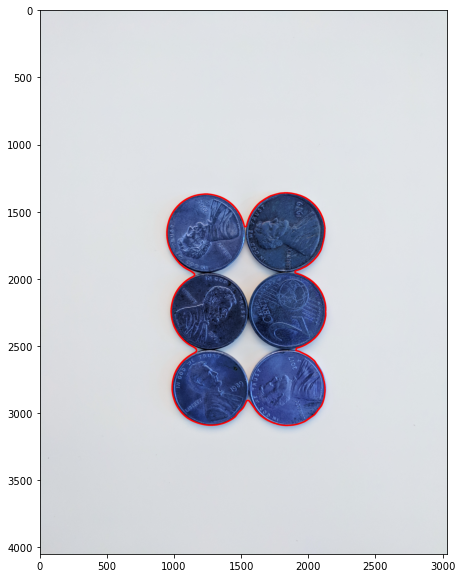

In [127]:
display(sep_coins)

### Otsu's method

In [128]:
img = cv2.imread('DATA/pennies.jpg')

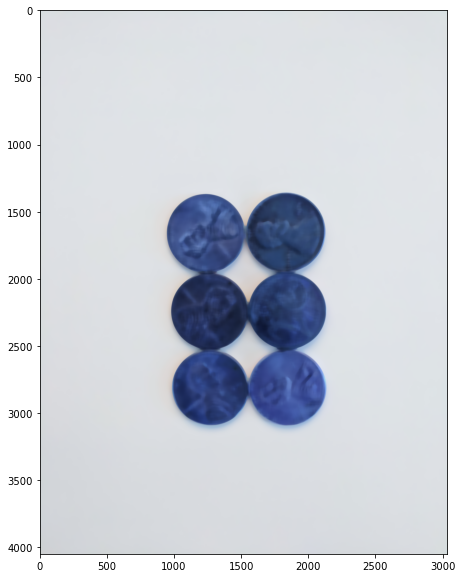

In [129]:
img = cv2.medianBlur(img, 35)
display(img)
# normally 35 is too strong for blur, but in this case we really try to remove the face

In [130]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

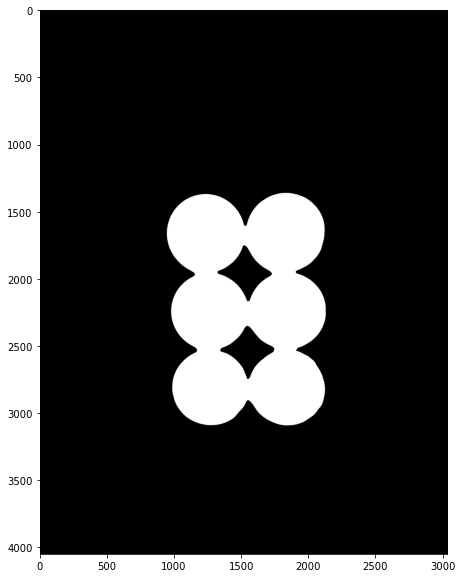

In [131]:
# Otsu's method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(thresh)
# Even with more advanced technique we still unable to separate them 

### NOISE REMOVAL (OPTIONAL)

won't matter much in this pennies image, but normally it is a common when dealing with complex images

In [132]:
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [133]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

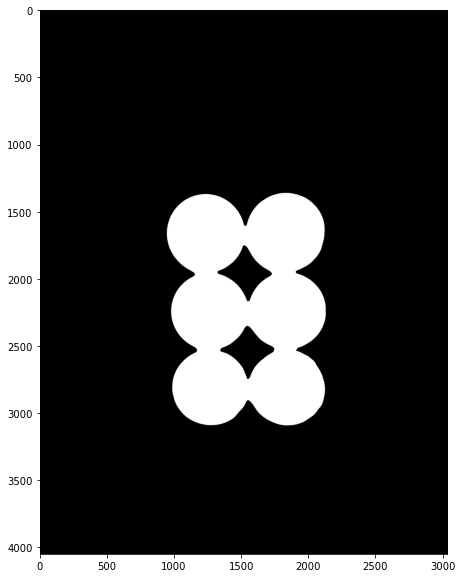

In [134]:
display(opening)

- As we can see the result won't change
- But normally it is a good idea to do it especially in complex images
- If you try to do normal threshold removing noise is also a good idea

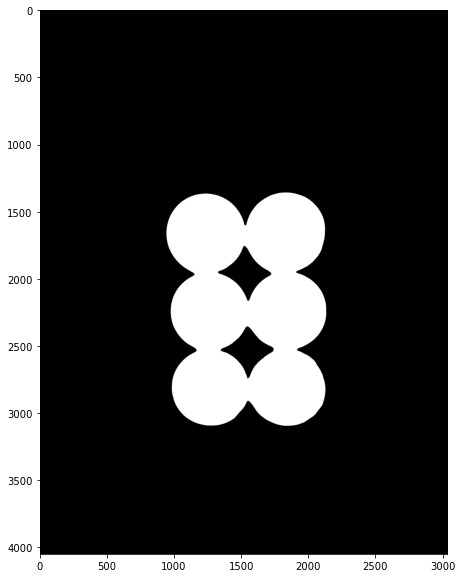

In [135]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg)

### Distance transform (gradient with middle being the brightest)
- Used for creating seed for Watershed Algorithm

In [136]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# source
# distanceType
# maskSize

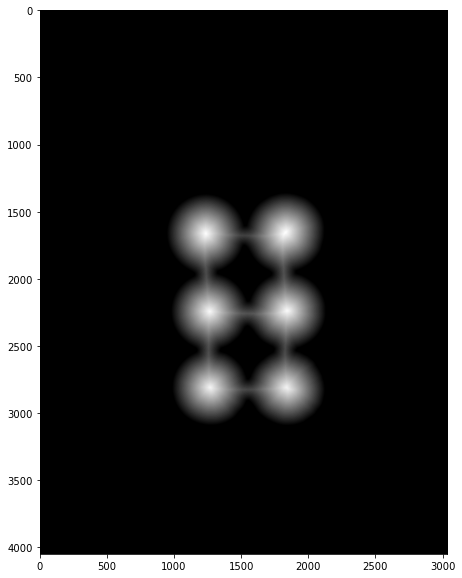

In [137]:
display(dist_transform)
# see how bright the middle is
# now we will try to apply thresholding to just grab those 6 dots
# then we can use them for `Watershed Algorithm` and tells it to use those are 6 segments it should be looking into

In [138]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
# source
# limit (typically, people will just use 70% of the max value from distance transform)
# color (255 == white)
# 0 

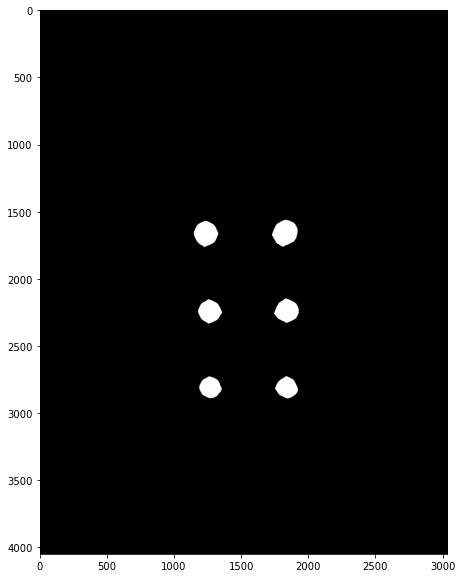

In [139]:
display(sure_fg)

In [140]:
sure_fg = np.uint8(sure_fg)

In [141]:
# Unknown region
# region that we aren't sure belong to background or foreground
unknown = cv2.subtract(sure_bg, sure_fg)

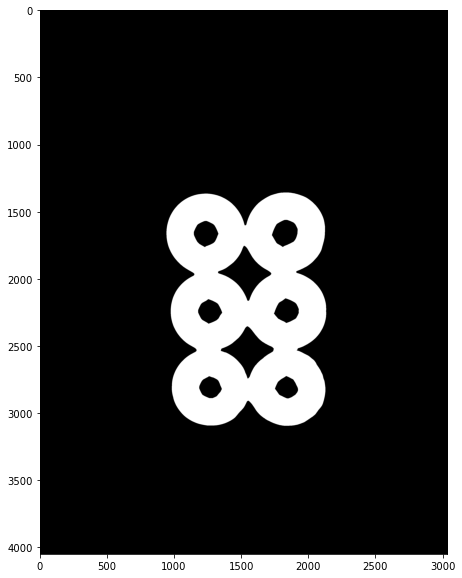

In [142]:
display(unknown)

### Create label markers for `Watershed Algorithm`

In [143]:
ret, markers = cv2.connectedComponents(sure_fg)
# markers for now include 0 and we want to chenge them to 1

In [144]:
markers = markers + 1
# change everything to 1 instead of 0
# reason being we can now change the unknown region to 0

In [145]:
markers[unknown==255] = 0
# change unknown from white to black (0)

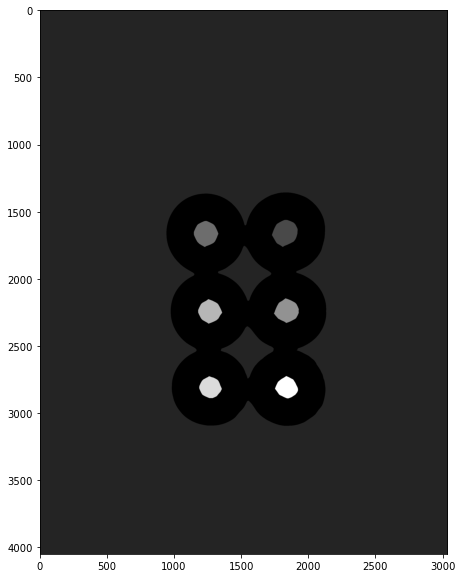

In [146]:
display(markers)

In [147]:
# Watershed Algorithm
markers = cv2.watershed(img, markers)

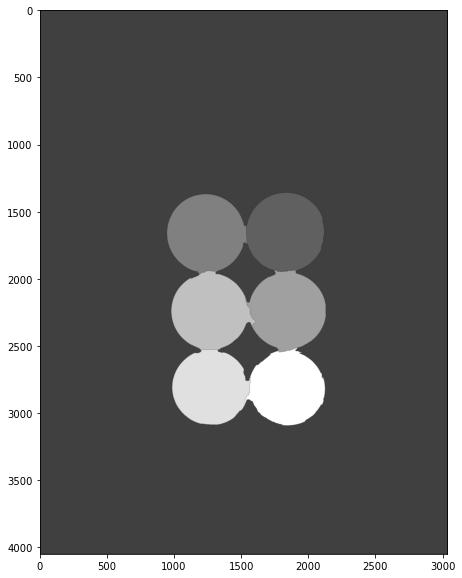

In [148]:
display(markers)
# six distinct gray

In [149]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [150]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

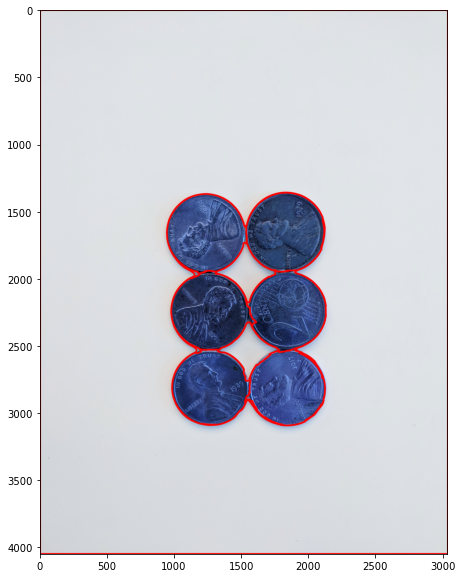

In [151]:
display(sep_coins)

## Custom Seeds with Watershed Algorithm

In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [153]:
road = cv2.imread('DATA/road_image.jpg')

In [154]:
road_copy = np.copy(road)

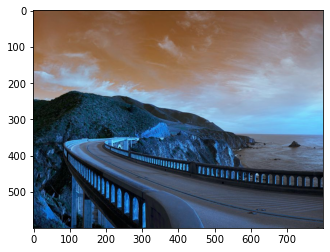

In [155]:
plt.imshow(road)

Next we want to create empty space to be drawn into

We will based this on road's shape

In [156]:
road.shape[:2]
# we just take first 2 (width, height)

(600, 800)

In [157]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)

In [158]:
segments = np.zeros(road.shape, dtype=np.uint8)

In [159]:
marker_image.shape

(600, 800)

In [160]:
segments.shape

(600, 800, 3)

In [161]:
from matplotlib import cm

In [162]:
cm.tab10(0)
# RGB and alpha parameter
# scale between 0 - 1 and we need to change it to between 0 - 255

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [163]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

# create function
# takes only rgb
# then change it to tuple

In [164]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [165]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [166]:
###
# GLOBAL VARIABLES

# COLOR CHOICE
n_markers = 10  # 0-9
current_marker = 1
# MARKERS UPDATED BY WATERSHED
marks_updated = False

In [167]:
# CALLBACK FUNCTION

def mouse_callback(event, x, y, flags, param):
    global marks_updated
        
    if event == cv2.EVENT_LBUTTONDOWN:
        # MARKERS PASSED TO THE WATERSHED ALGORITHM
        cv2.circle(marker_image, (x,y), 10, (current_marker), -1)

        # MARKERS USER SEES ON THE ROAD IMAGE
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1)

        marks_updated = True

In [168]:
# WHILE TRUE
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)
    
    # CLOSE ALL WINDOWS
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
    # CLEARING ALL THE COLORS PRESS C KEY (Reset the image)
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)
        
    # UPDATE COLOR CHOICE
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    # UPDATE THE MARKINGS
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape, dtype=np.uint8)
        
        for color_ind in range(n_markers):
            #COLORING SEGMENTS, NUMPY CALL
            segments[marker_image_copy==(color_ind)] = colors[color_ind]
            
cv2.destroyAllWindows()

## Introduction to Face Detection

## Face Detection with OpenCV

In [230]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [231]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('DATA/solvay_conference.jpg', 0)

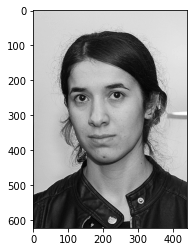

In [232]:
plt.imshow(nadia, cmap='gray')

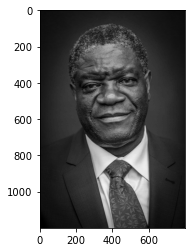

In [233]:
plt.imshow(denis, cmap='gray')

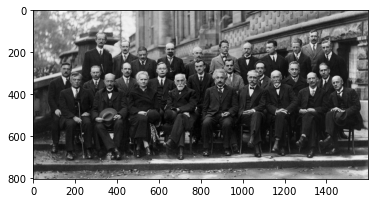

In [234]:
plt.imshow(solvay, cmap='gray')

In [235]:
# consist alist of around 6000 classifier features that are going to be passed through to the image
# and be an indication wether thereis a face there
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [245]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (0, 255, 0), 10)
    
    return face_img

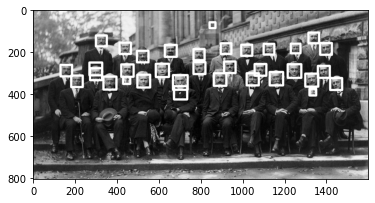

In [237]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')
# we can see the result here, if only 1 face our model manage to detect it
# but with multiple faces, it has a harder time (double detect, detect face where nowhere to be seen)
# therefore we need to adjust it further

In [252]:
def adj_detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (0,0,255), 10)
    
    return face_img

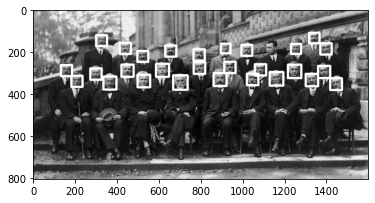

In [239]:
result = adj_detect_face(solvay)
plt.imshow(result, cmap='gray')
# we get much better result with the caveat, the man who looking sideways now undetected
# we can try to play around with scaleFactor and minNeighbors to find the balance
# keep in mind when we try to detect faces that's not from front, some model that trained for front faces might not perform well

In [240]:
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [250]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0), 10) 
        
    return face_img

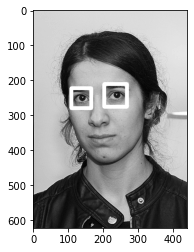

In [242]:
result = detect_eyes(nadia)
plt.imshow(result, cmap='gray')
# if the model detect other than eyes, then we can try to adjust the detectMultiScale

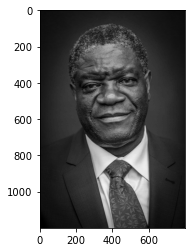

In [243]:
result = detect_eyes(denis)
plt.imshow(result, cmap='gray')
# see we don't see any detection, it is because the white of his eyes is dark
# furthermore because of the editing, the area around his nose is lighter
# while nadia's image has lighter eyes and that is the feature that this model serch for

### Using video

In [253]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read(0)
    
    frame = adj_detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()